# Exploration of the dataset:
## Source: https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets

In [ ]:
import os
from matplotlib import pyplot as plt  

In [10]:
# Load dataset
raw_data_directory = "../data/raw/"
plane = "axial/"
dataset_part = "train/"

In [11]:
root_directory = raw_data_directory + plane 

annotations_dir = root_directory + "labels/" + dataset_part
images_dir = root_directory + "images/" + dataset_part

dataset = []

for filename in os.listdir(annotations_dir):
    if not filename.endswith(".txt"):
        continue

    file_path = os.path.join(annotations_dir, filename)
    image_name = os.path.splitext(filename)[0] + ".jpg"
    image_path = os.path.join(images_dir, image_name)

    labels = []
    bboxes = []

    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue  # Skip malformed lines
            label = int(parts[0])
            bbox = [float(x) for x in parts[1:]]  # [x_center, y_center, width, height]

            labels.append(label)
            bboxes.append(bbox)

    dataset.append({
        "image_path": image_path,
        "labels": labels,
        "bboxes": bboxes
    })
print(1)
for data in dataset[:3]:
    print("Image:", data["image_path"])
    print("Labels:", data["labels"])
    print("Bounding boxes:", data["bboxes"])
    


1
Image: ../data/raw/axial/images/train/00095_170.jpg
Labels: [0]
Bounding boxes: [[0.428991, 0.361502, 0.144366, 0.150235]]
Image: ../data/raw/axial/images/train/00095_176.jpg
Labels: [0]
Bounding boxes: [[0.443075, 0.373826, 0.142019, 0.193662]]
Image: ../data/raw/axial/images/train/00095_188.jpg
Labels: [0]
Bounding boxes: [[0.424883, 0.376761, 0.215962, 0.248826]]


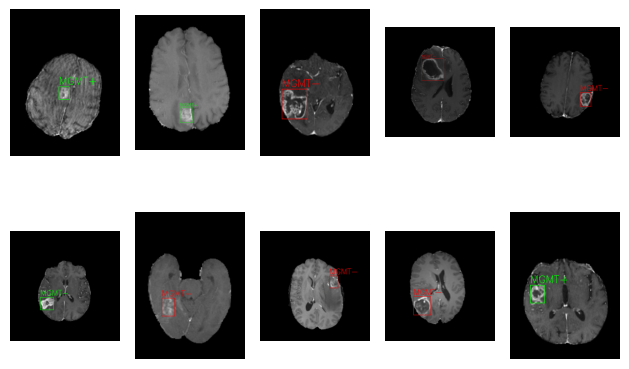

In [ ]:
# Display examples

import cv2
import random
from matplotlib import pyplot as plt 

label_color = {0: (255, 0, 0), 1: (0, 255, 0)}
label_text = {0: "MGMT-", 1: "MGMT+"}

samples = random.sample(dataset, 10)

for i, sample in enumerate(samples):
    img_path = sample["image_path"]
    labels = sample["labels"]
    bboxes = sample["bboxes"]

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_h, img_w = img.shape[:2]

    for label, bbox in zip(labels, bboxes):
        x_center, y_center, width, height = bbox

        x_1 = int((x_center - width/2) * img_w)
        y_1 = int((y_center - height/2) * img_h)
        x_2 = int((x_center + width/2) * img_w)
        y_2 = int((y_center + height/2) * img_h)

        color = label_color.get(label,(0, 0, 0))
        text = label_text.get(label, "Unknown" )

        cv2.rectangle(img, (x_1, y_1), (x_2, y_2), color)
        cv2.putText(img, text, (x_1, y_1-4), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color)

    plt.figure("Display samples")
    plt.subplot(2, 5, i+1) 
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()  
plt.show()

